In [1]:
import numpy
import pandas

In [2]:
import os
import matplotlib.pyplot as plt 
import cv2 
import tensorflow as tf
from tensorflow.keras.preprocessing import image 

In [3]:
img1=cv2.imread(r'C:\Users\Rohit94\Documents\project_2023\Image-Forgery-Detection\datasets\Au\Au_ani_00001.jpg')
print(img1)

[[[227 186  77]
  [224 183  74]
  [221 179  72]
  ...
  [206 150  55]
  [207 151  56]
  [207 151  56]]

 [[222 181  72]
  [219 178  69]
  [217 175  68]
  ...
  [206 150  55]
  [207 151  56]
  [207 151  56]]

 [[218 176  69]
  [216 174  67]
  [212 173  65]
  ...
  [206 151  54]
  [206 151  54]
  [207 152  55]]

 ...

 [[ 29  55  67]
  [ 25  51  63]
  [ 26  52  64]
  ...
  [ 24  53  67]
  [ 27  57  68]
  [ 29  59  70]]

 [[ 23  49  61]
  [ 24  50  62]
  [ 26  52  64]
  ...
  [ 26  53  67]
  [ 27  55  66]
  [ 27  55  66]]

 [[ 14  40  52]
  [ 18  44  56]
  [ 22  48  60]
  ...
  [ 24  51  65]
  [ 22  50  61]
  [ 20  48  59]]]


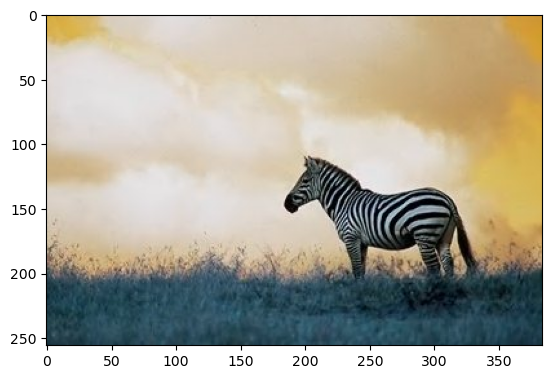

In [4]:
#previewing the image using open cv 
plt.imshow(img1)

In [5]:
#evaluating the size of the image 
print("the shape of the image ")
print(img1.shape)
#so we can see that the image has height=64 px , width=64 px , channel= 3
#so the image is an rgb image

the shape of the image 
(256, 384, 3)


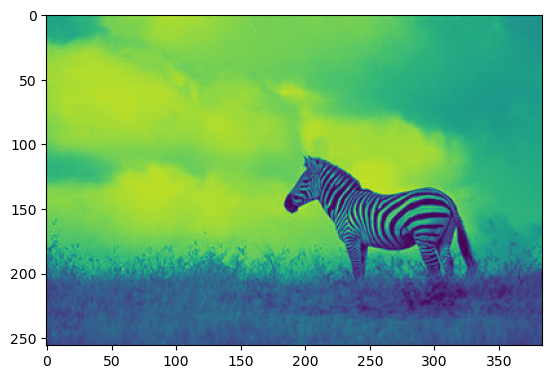

In [6]:
img_gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

In [7]:
img_gray.shape

(256, 384)

In [8]:
img_gray

array([[158, 155, 152, ..., 128, 129, 129],
       [153, 150, 148, ..., 128, 129, 129],
       [149, 147, 145, ..., 128, 128, 129],
       ...,
       [ 56,  52,  53, ...,  54,  57,  59],
       [ 50,  51,  53, ...,  54,  55,  55],
       [ 41,  45,  49, ...,  52,  50,  48]], dtype=uint8)

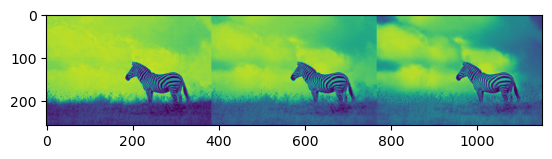

In [9]:
#playing with the colors of the image 
import numpy as np
imgblue=img1[:,:,0]
imggreen=img1[:,:,1]
imgred=img1[:,:,2]
new_image=np.hstack((imgblue,imggreen,imgred))
plt.imshow(new_image)
#so here we can see that since the image does not contain any colors whatever the changes made in the 
#color channel does not reflect on the image 

(([], []), ([], []))

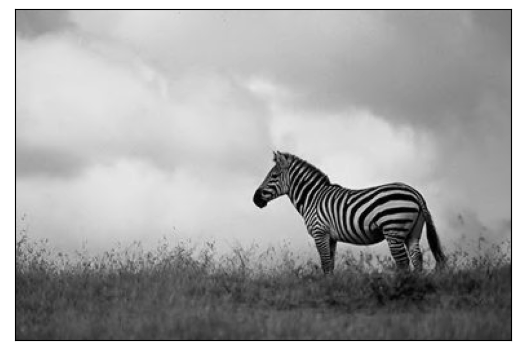

In [10]:
img = cv2.imread(r'C:\Users\Rohit94\Documents\project_2023\Image-Forgery-Detection\datasets\Au\Au_ani_00001.jpg', 0)
plt.imshow(img, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

Text(0, 0.5, 'Frequency')

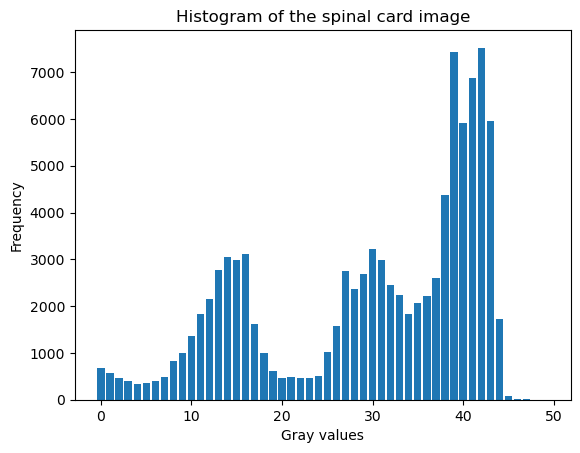

In [11]:
hist = cv2.calcHist([img],[0],None,[50],[0,256])

# different methods for displaying a histogram
plt.bar(range(50), hist.ravel())
plt.title('Histogram of the spinal card image')
plt.xlabel('Gray values')
plt.ylabel('Frequency')

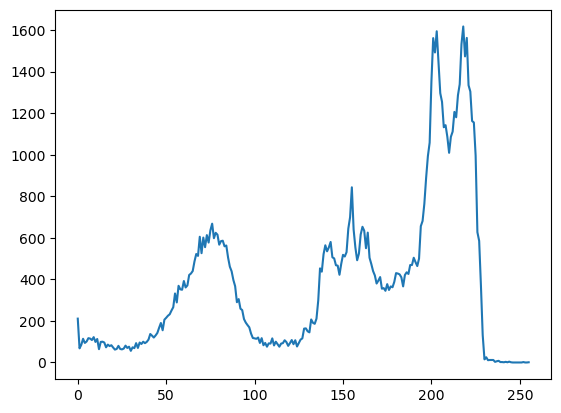

In [12]:
import numpy as np
hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.plot(hist)

In [12]:
def compute_ela_cv(path, quality):
    temp_filename = 'temp_file_name.jpg'
    SCALE = 15
    orig_img = cv2.imread(path)
    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
    
    cv2.imwrite(temp_filename, orig_img, [cv2.IMWRITE_JPEG_QUALITY, quality])

    # read compressed image
    compressed_img = cv2.imread(temp_filename)

    # get absolute difference between img1 and img2 and multiply by scale
    diff = SCALE * cv2.absdiff(orig_img, compressed_img)
    return diff


def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)

    ela_image = ImageChops.difference(image, temp_image)

    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1

    scale = 255.0 / max_diff
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image


def random_sample(path, extension=None):
    if extension:
        items = Path(path).glob(f'*.{extension}')
    else:
        items = Path(path).glob(f'*')
        
    items = list(items)
        
    p = random.choice(items)
    return p.as_posix()

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [14]:
images_dir = r"C:\Users\Rohit94\Documents\project_2023\Image-Forgery-Detection\datasets"

In [15]:
batch_size = 32
img_height = 224
img_width = 224

In [16]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  images_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1880 files belonging to 2 classes.
Using 1504 files for training.


In [17]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  images_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1880 files belonging to 2 classes.
Using 376 files for validation.


In [18]:
class_names = train_ds.class_names
print(class_names)

['Au', 'Tp']


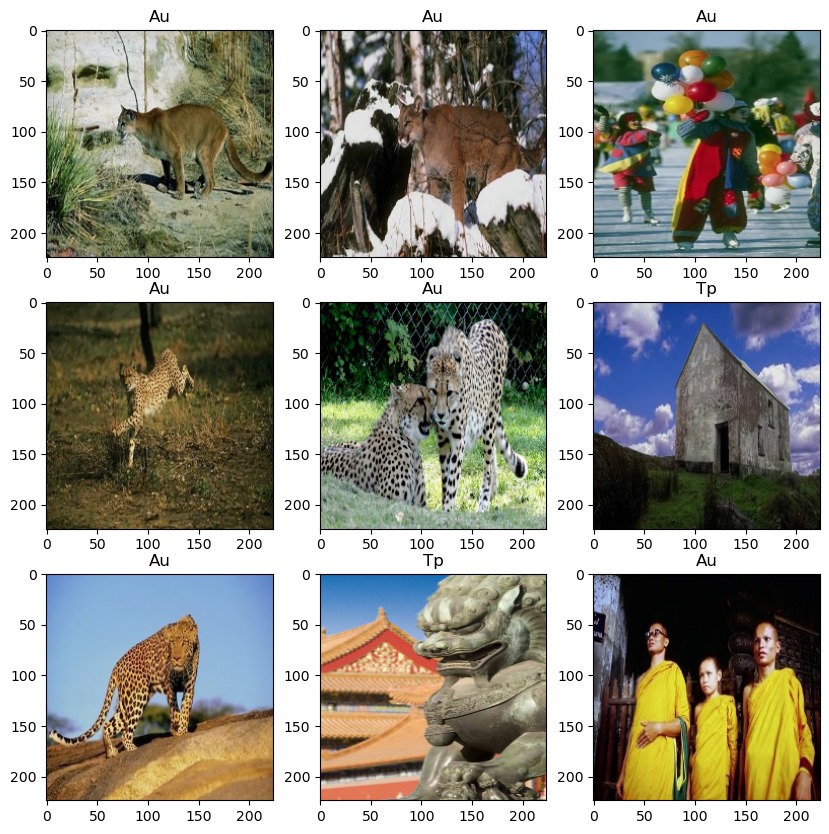

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

In [20]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [69]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [70]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9355742


In [71]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [72]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)       

In [74]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
47/47 [==============================] - 20s 402ms/step - loss: 0.6938 - accuracy: 0.6483 - val_loss: 0.5292 - val_accuracy: 0.7394
Epoch 2/10
47/47 [==============================] - 19s 400ms/step - loss: 0.5147 - accuracy: 0.7573 - val_loss: 0.5031 - val_accuracy: 0.7500
Epoch 3/10
47/47 [==============================] - 19s 405ms/step - loss: 0.4157 - accuracy: 0.8145 - val_loss: 0.4769 - val_accuracy: 0.7660
Epoch 4/10
47/47 [==============================] - 19s 394ms/step - loss: 0.3184 - accuracy: 0.8670 - val_loss: 0.4528 - val_accuracy: 0.8271
Epoch 5/10
47/47 [==============================] - 20s 420ms/step - loss: 0.2281 - accuracy: 0.9149 - val_loss: 0.5258 - val_accuracy: 0.7793
Epoch 6/10
47/47 [==============================] - 19s 407ms/step - loss: 0.1766 - accuracy: 0.9375 - val_loss: 0.5482 - val_accuracy: 0.7979
Epoch 7/10
47/47 [==============================] - 20s 415ms/step - loss: 0.1433 - accuracy: 0.9515 - val_loss: 0.7150 - val_accuracy: 0.8511

In [76]:
model.save("Image_forgery.h5")

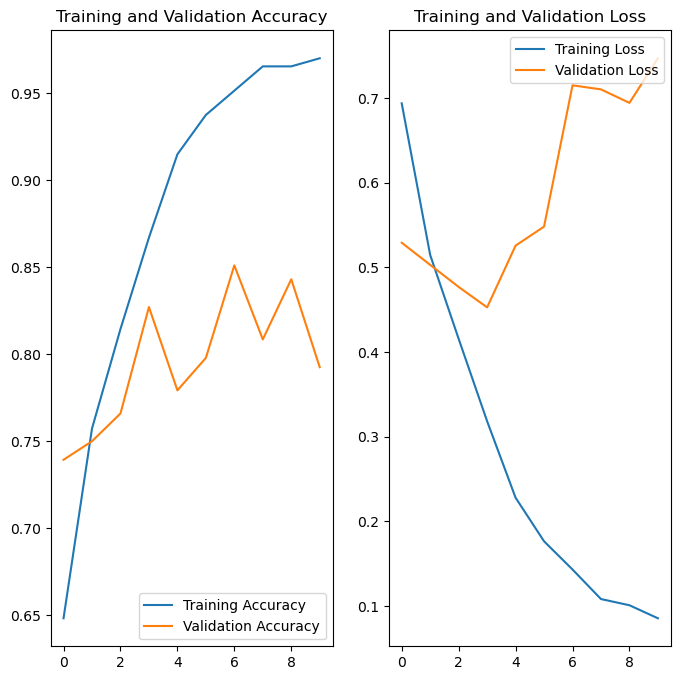

In [75]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
import numpy as np
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    images_dir, # Put your path here
     target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

Found 2337 images belonging to 2 classes.


C:\Users\Rohit94\AppData\Local\Temp\ipykernel_43948\2664318057.py:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)


In [29]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys()) 

In [30]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())

In [31]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

              precision    recall  f1-score   support

          Au       0.82      0.91      0.86      1162
          Tp       0.90      0.81      0.85      1175

    accuracy                           0.86      2337
   macro avg       0.86      0.86      0.86      2337
weighted avg       0.86      0.86      0.86      2337



In [46]:
from tensorflow import keras
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import numpy as np

In [62]:
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)  

traindata=image_generator.flow_from_directory(batch_size=32,
                                                 directory=r'C:\Users\Rohit94\Documents\project_2023\Image-Forgery-Detection\datasets',
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="training",
                                                 class_mode='categorical')
testdata=image_generator.flow_from_directory(batch_size=32,
                                                 directory=r'C:\Users\Rohit94\Documents\project_2023\Image-Forgery-Detection\datasets',
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1870 images belonging to 2 classes.
Found 467 images belonging to 2 classes.


In [63]:
#importing VGG16 algorithm 
VGG=keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
VGG.trainable=False

In [64]:
model=keras.Sequential([
    VGG,
    keras.layers.Flatten(),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dense(units=2,activation='softmax')
    
])

In [65]:
model.compile(optimizer='adam',loss=tf.losses.CosineSimilarity(),metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 25088)             0         
                                                                 
 dense_14 (Dense)            (None, 256)               6422784   
                                                                 
 dense_15 (Dense)            (None, 256)               65792     
                                                                 
 dense_16 (Dense)            (None, 2)                 514       
                                                                 
Total params: 21,203,778
Trainable params: 6,489,090
Non-trainable params: 14,714,688
_________________________________________________________________


In [68]:
hist=model.fit_generator(steps_per_epoch=50,generator=traindata,validation_data=testdata,validation_steps=3,epochs=10)

Epoch 1/10


C:\Users\Rohit94\AppData\Local\Temp\ipykernel_43948\2936488307.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(steps_per_epoch=50,generator=traindata,validation_data=testdata,validation_steps=3,epochs=10)


50/50 [==============================] - 151s 3s/step - loss: -0.4981 - accuracy: 0.4981 - val_loss: -0.4375 - val_accuracy: 0.4375
Epoch 2/10
50/50 [==============================] - 459s 9s/step - loss: -0.4981 - accuracy: 0.4981 - val_loss: -0.4687 - val_accuracy: 0.4688
Epoch 3/10
50/50 [==============================] - 159s 3s/step - loss: -0.5000 - accuracy: 0.5000 - val_loss: -0.6042 - val_accuracy: 0.6042
Epoch 4/10
50/50 [==============================] - 178s 4s/step - loss: -0.4930 - accuracy: 0.4930 - val_loss: -0.4687 - val_accuracy: 0.4688
Epoch 5/10
50/50 [==============================] - 130s 3s/step - loss: -0.4874 - accuracy: 0.4874 - val_loss: -0.5625 - val_accuracy: 0.5625
Epoch 6/10
50/50 [==============================] - 153s 3s/step - loss: -0.4956 - accuracy: 0.4956 - val_loss: -0.5104 - val_accuracy: 0.5104
Epoch 7/10
50/50 [==============================] - 252s 5s/step - loss: -0.5006 - accuracy: 0.5006 - val_loss: -0.4583 - val_accuracy: 0.4583
Epoch 8/10

image (1, 224, 224, 3)
1/1 [==============================] - 0s 86ms/step
[[ 0.2772402  -0.67757666]]


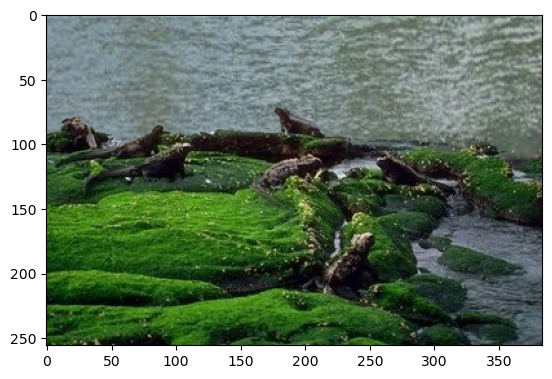

In [82]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from keras.applications.imagenet_utils import preprocess_input
# Load the trained model
model = load_model('Image_forgery.h5')

# Load the input image
img = cv2.imread(r'C:\Users\Rohit94\Documents\project_2023\Image-Forgery-Detection\datasets\Tp\Tp_D_CND_M_N_ani00018_sec00096_00138.tif')


from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
img_path=r'C:\Users\Rohit94\Documents\project_2023\Image-Forgery-Detection\datasets\Tp\Tp_D_CND_M_N_ani00018_sec00096_00138.tif'
img =image.load_img(img_path,target_size=(224,224))

x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

print('image',x.shape)

my_image=imread(img_path)
plt.imshow(my_image,cmap='gray')

print(model.predict(x))


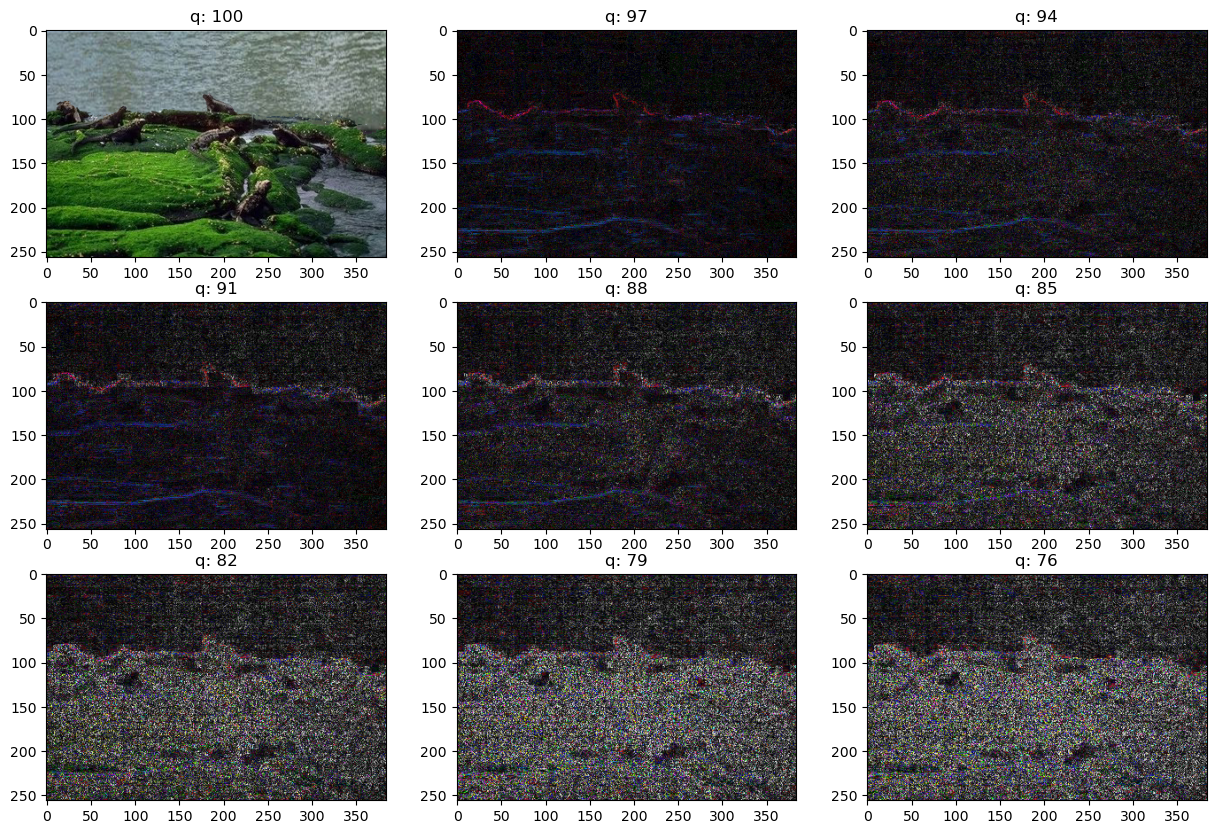

In [17]:
#test on tmpered image
orig = cv2.imread(r"C:\Users\Rohit94\Documents\project_2023\Image-Forgery-Detection\datasets\Tp\Tp_D_CND_M_N_ani00018_sec00096_00138.tif")
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB) / 255.0
init_val = 100
columns = 3
rows = 3

fig=plt.figure(figsize=(15, 10))
for i in range(1, columns*rows +1):
    quality=init_val - (i-1) * 3
    img = compute_ela_cv(path=r"C:\Users\Rohit94\Documents\project_2023\Image-Forgery-Detection\datasets\Tp\Tp_D_CND_M_N_ani00018_sec00096_00138.tif", quality=quality)
    if i == 1:
        img = orig.copy()
    ax = fig.add_subplot(rows, columns, i) 
    ax.title.set_text(f'q: {quality}')
    plt.imshow(img)
plt.show()

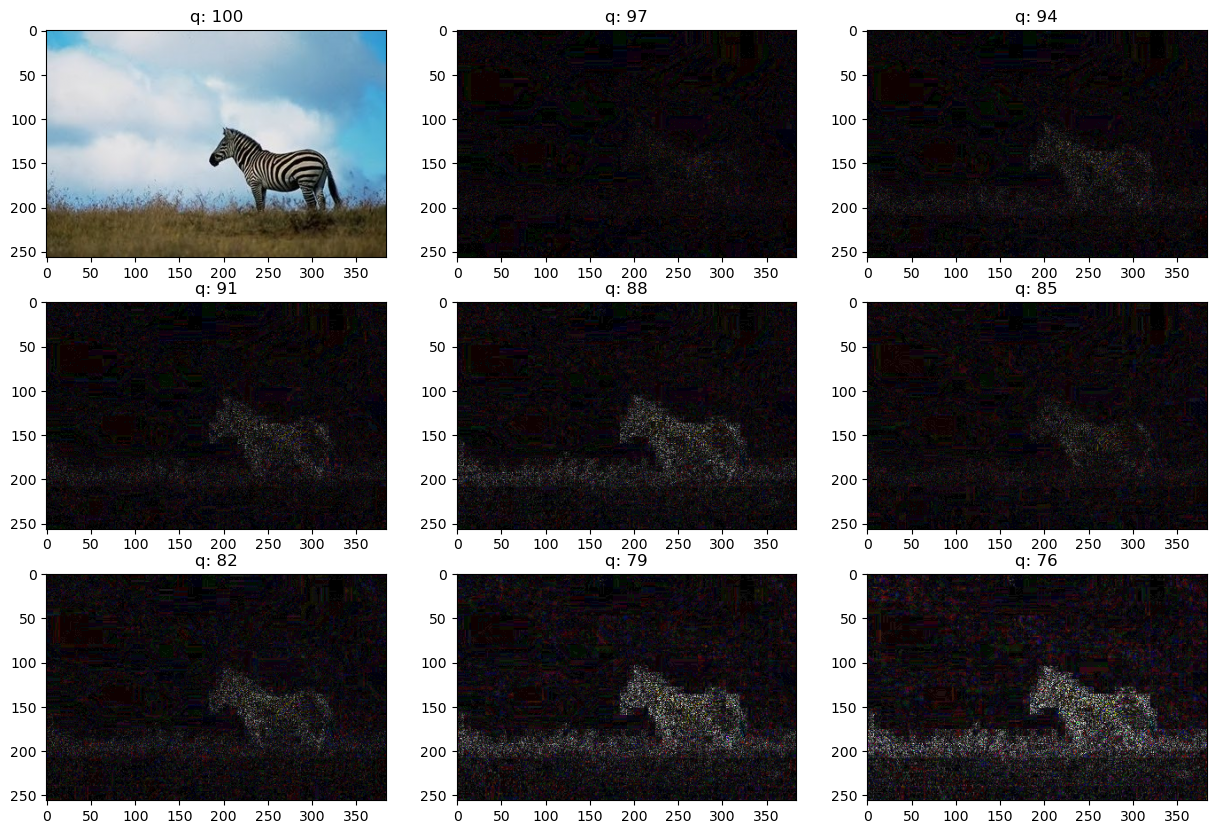

In [19]:
#test on authentic image

orig = cv2.imread(r"C:\Users\Rohit94\Documents\project_2023\Image-Forgery-Detection\datasets\Au\Au_ani_00001.jpg")
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB) / 255.0
init_val = 100
columns = 3
rows = 3

fig=plt.figure(figsize=(15, 10))
for i in range(1, columns*rows +1):
    quality=init_val - (i-1) * 3
    img = compute_ela_cv(path=r"C:\Users\Rohit94\Documents\project_2023\Image-Forgery-Detection\datasets\Au\Au_ani_00001.jpg", quality=quality)
    if i == 1:
        img = orig.copy()
    ax = fig.add_subplot(rows, columns, i) 
    ax.title.set_text(f'q: {quality}')
    plt.imshow(img)


In [3]:
import numpy as np
import warnings
import keras

from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing.image import ImageDataGenerator




def m1():
    def VGGupdated(input_tensor=None,classes=2):
        img_rows,img_cols=224,224     #default
        img_channels=3

        img_dim=(img_rows,img_cols,img_channels)

        img_input=Input(shape=img_dim)
 
        #block1
        x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
        x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
        x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

        # Block 2
        x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
        x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
        x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

        # Block 3
        x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
        x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
        x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
        x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

        # Block 4
        x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
        x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
        x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
        x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

        # Block 5
        x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
        x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
        x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
        x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

        x = Flatten(name='flatten')(x)
        x = Dense(4096, activation='relu', name='fc1')(x)
        x = Dense(4096, activation='relu', name='fc2')(x)
        x = Dense(classes, activation='softmax', name='predictions')(x)

        model=Model(inputs=img_input,outputs=x,name='VGG16_demo')
        return model




    model=VGGupdated(classes=2)

    #model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


    model.save(r"stmodel.h5")

m1()

In [4]:
def vggtrain():

    
    print("Model is loading wait")
    model=load_model(r"stmodel.h5")
    dataset_path=os.listdir(r'C:\Users\Rohit94\Documents\project_2023\Image-Forgery-Detection\Image_forgery_detection\data')
    room_types=os.listdir(r'C:\Users\Rohit94\Documents\project_2023\Image-Forgery-Detection\Image_forgery_detection\data')
    
    rooms=[]
    for item in room_types:
        all_rooms=os.listdir(r'C:\Users\Rohit94\Documents\project_2023\Image-Forgery-Detection\Image_forgery_detection\data'+'/'+item)
    
        for room in all_rooms:
            rooms.append((item,str(r'C:\Users\Rohit94\Documents\project_2023\Image-Forgery-Detection\Image_forgery_detection\data'+'/'+item)+'/'+room))
            #print(rooms)
    
    
    rooms_df=pd.DataFrame(data=rooms,columns=['Image type','image'])
    print(rooms_df)
    
    
    
    print("Total Images:",len(rooms_df))
    room_count=rooms_df['Image type'].value_counts()
    print("Images in category:",room_count)
    
    import cv2
    path=r'C:\Users\Rohit94\Documents\project_2023\Image-Forgery-Detection\Image_forgery_detection\data'
    
    img_size=224
    
    images=[]
    labels=[]
    tamp=0
    org=0
    
    for i in room_types:
        data_path=path +'/'+ str(i)
        filenames=[i for i in os.listdir(data_path)]
    
        for f in filenames:
            if i=='original':
                org+=1
            else:
                tamp+=1
            img=cv2.imread(data_path+'/'+f)
            img=cv2.resize(img,(img_size,img_size))
            images.append(img)
            labels.append(i)
    

    images=np.array(images)
    images=images.astype('float32')/255.0
    #images.shape

    #print(images)

    from sklearn.preprocessing import LabelEncoder,OneHotEncoder
    from sklearn.compose import ColumnTransformer
    y=rooms_df['Image type'].values
    #print(y)
    y_labelencoder=LabelEncoder()
    #print(len(y.shape))
    y=y_labelencoder.fit_transform(y)
    #print(y)
    
    y=y.reshape(-1,1)
    #print(y)
    ct=ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
    y = np.array(ct.fit_transform(y))
    #print(y)


    from sklearn.utils import shuffle
    from sklearn.model_selection import train_test_split

    images, Y=shuffle(images,y,random_state=1)
    train_x,test_x,train_y,test_y=train_test_split(images,y,test_size=0.05,random_state=415)

    model.fit(train_x,train_y,batch_size=2,epochs=1,verbose=0,)

    history=model.fit(train_x,train_y,batch_size=2,epochs=1,verbose=1,validation_data=(test_x,test_y))
    print(history.history)
    print(history.history['val_accuracy'])

    import matplotlib.pyplot as plt
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('plotting')
    plt.ylabel('acc loss')
    plt.xlabel('epoch')
    plt.legend(['acc','valacc','loss','valloss'],loc='upper left')
    plt.show()
    
    
    model.save("stmodel.h5")
    _, trainacc = model.evaluate(train_x, train_y)
    _, testacc = model.evaluate(test_x, test_y)

    import matplotlib.pyplot as plt
    data={"ORIGINAL":org,"TAMPERED":tamp}
    Imgcat=list(data.keys())
    Imgcou=list(data.values())
    fig=plt.figure(figsize=(3,3))
    plt.bar(Imgcat,Imgcou,color=['blue','green'],width=0.5)
    plt.xlabel("Image Types")
    plt.ylabel("No of Images")
    plt.show()

    
    import matplotlib.pyplot as plt
    fig=plt.figure()
    fig.patch.set_facecolor('lightcyan')
    fig.suptitle("ACCURACY OF VGG16 MODEL\nTrain_Accuracy:{}\nTest_Accuracy{}:".format(trainacc,testacc),fontsize=20,fontweight='bold',color='lime')
    

    
    plt.show()
    

    
    return True

a=vggtrain()

Model is loading wait
     Image type                                              image
0            Au  C:\Users\Rohit94\Documents\project_2023\Image-...
1            Au  C:\Users\Rohit94\Documents\project_2023\Image-...
2            Au  C:\Users\Rohit94\Documents\project_2023\Image-...
3            Au  C:\Users\Rohit94\Documents\project_2023\Image-...
4            Au  C:\Users\Rohit94\Documents\project_2023\Image-...
...         ...                                                ...
2332         Tp  C:\Users\Rohit94\Documents\project_2023\Image-...
2333         Tp  C:\Users\Rohit94\Documents\project_2023\Image-...
2334         Tp  C:\Users\Rohit94\Documents\project_2023\Image-...
2335         Tp  C:\Users\Rohit94\Documents\project_2023\Image-...
2336         Tp  C:\Users\Rohit94\Documents\project_2023\Image-...

[2337 rows x 2 columns]
Total Images: 2337
Images in category: Tp    1175
Au    1162
Name: Image type, dtype: int64


KeyboardInterrupt: 